# Lab 5 - Classification : Naive Bayes and Logistic Regression

# Optical recognition of handwritten digits dataset
**Download dataset from sklearn. The dataset has 10 classes and 64 attributes (8x8 images). Visualise images from the dataset. Perform a train test split in the ratio 4:1.**

# Using sklearn (25 points)

**For this exercise, you will use the naive bayes and logistic regression functions in sklearn. Use the optical recognition dataset.**


**a) Logistic Regression - use one vs all classification method to classify the dataset into one of the ten classes. Report the accuracies in terms of F1 scores and the confusion matrix (use sklearn functions for this too). Tune parameters to obtain the best results.**

**b) Naive Bayes - perform multiclass classification to classify the dataset into one of the ten classes. Experiment with all the priors available (Gaussian, Bernoulli, etc) and report the best prior. Report the accuracies in terms of F1 scores and the confusion matrix (use sklearn functions for this too).**

**Estimated Time: 50 mins**

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.datasets import load_digits
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm

In [2]:
# Code here
digits = load_digits()

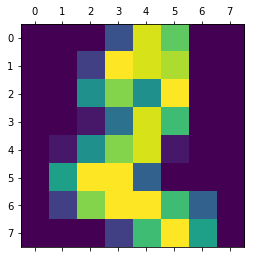

In [9]:
plt.matshow(digits.images[2])

In [5]:
X = digits.data
y = digits.target

(1797, 64)
(1797,)


In [44]:
#normalize the data
X = MinMaxScaler().fit_transform(X)

In [45]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2)

In [30]:
def predict_metrics(ypred, ytrue):
    print('accuracy: ',accuracy_score(ypred, ytrue))
    print('f1 scores for each class: ',f1_score(ytrue, ypred, average = None))
    print('confusion matrix: ')
    print(confusion_matrix(ytrue, ypred))
    return

In [46]:
alpha = np.logspace(-3,3,1000)

In [48]:
best_accuracy = 0
for alpha_val in tqdm(alpha):
    logR = LogisticRegression(C = alpha_val)
    logR.fit(xtrain, ytrain)
    predictions = logR.predict(xtest)
    #predict_metrics(predictions, ytest)
    accuracy = accuracy_score(predictions, ytest)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_alpha = alpha_val

100%|██████████| 1000/1000 [02:28<00:00,  3.26it/s]


In [49]:
print(best_accuracy)
print(best_alpha)

0.9694444444444444
1.7030650292528444


In [50]:
best_model = LogisticRegression(C = best_alpha)
best_model.fit(xtrain, ytrain)
predictions = best_model.predict(xtest)
predict_metrics(predictions, ytest)

accuracy:  0.9694444444444444
f1 scores for each class:  [1.         0.94252874 0.98591549 0.98795181 0.96202532 1.
 0.97368421 0.98360656 0.93333333 0.93670886]
confusion matrix: 
[[34  0  0  0  0  0  0  0  0  0]
 [ 0 41  0  0  0  0  0  0  0  0]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 41  0  0  0  0  0  1]
 [ 0  0  0  0 38  0  0  1  0  2]
 [ 0  0  0  0  0 28  0  0  0  0]
 [ 0  2  0  0  0  0 37  0  0  0]
 [ 0  0  0  0  0  0  0 30  0  0]
 [ 0  2  1  0  0  0  0  0 28  0]
 [ 0  1  0  0  0  0  0  0  1 37]]


In [54]:
gnb = GaussianNB()
gnb.fit(xtrain, ytrain)
predictions = gnb.predict(xtest)
predict_metrics(predictions, ytest)

accuracy:  0.8111111111111111
f1 scores for each class:  [1.         0.76315789 0.61818182 0.87804878 0.7761194  0.96296296
 0.975      0.6741573  0.69230769 0.78873239]
confusion matrix: 
[[34  0  0  0  0  0  0  0  0  0]
 [ 0 29  1  0  0  0  1  6  3  1]
 [ 0  1 17  3  0  0  0  0 13  1]
 [ 0  0  1 36  0  0  0  0  3  2]
 [ 0  1  0  0 26  0  0 14  0  0]
 [ 0  0  0  0  0 26  0  2  0  0]
 [ 0  0  0  0  0  0 39  0  0  0]
 [ 0  0  0  0  0  0  0 30  0  0]
 [ 0  2  0  0  0  0  0  2 27  0]
 [ 0  2  1  1  0  0  1  5  1 28]]


In [55]:
mnb = MultinomialNB()
mnb.fit(xtrain, ytrain)
predictions = mnb.predict(xtest)
predict_metrics(predictions, ytest)

accuracy:  0.8694444444444445
f1 scores for each class:  [0.98507463 0.775      0.83333333 0.92307692 0.91139241 0.85714286
 0.96103896 0.87878788 0.75362319 0.81927711]
confusion matrix: 
[[33  0  0  0  1  0  0  0  0  0]
 [ 0 31  5  0  0  0  1  0  3  1]
 [ 0  1 30  0  0  0  0  1  3  0]
 [ 0  0  1 36  0  0  0  0  2  3]
 [ 0  1  0  0 36  0  0  2  2  0]
 [ 0  0  0  0  1 21  0  0  0  6]
 [ 0  2  0  0  0  0 37  0  0  0]
 [ 0  0  0  0  0  0  0 29  1  0]
 [ 0  3  1  0  0  0  0  1 26  0]
 [ 0  1  0  0  0  0  0  3  1 34]]


In [56]:
bnb = BernoulliNB()
bnb.fit(xtrain, ytrain)
predictions = bnb.predict(xtest)
predict_metrics(predictions, ytest)

accuracy:  0.8
f1 scores for each class:  [0.95522388 0.52631579 0.7826087  0.88607595 0.86419753 0.75555556
 0.925      0.85294118 0.67605634 0.76190476]
confusion matrix: 
[[32  0  0  0  2  0  0  0  0  0]
 [ 0 20  6  0  2  0  1  1 10  1]
 [ 0  1 27  2  0  0  0  1  4  0]
 [ 0  1  1 35  0  0  0  0  1  4]
 [ 0  1  0  0 35  0  1  4  0  0]
 [ 1  2  0  0  1 17  2  0  0  5]
 [ 0  2  0  0  0  0 37  0  0  0]
 [ 0  0  0  0  0  0  0 29  1  0]
 [ 0  3  0  0  0  0  0  1 24  3]
 [ 0  5  0  0  0  0  0  2  0 32]]


- Logistics regression has high accuracy and f1 score compared to naive bayes.
- The best parameter for C = 1.703.
- Multinomial Naive bayes perform better in comparison with other gaussian and bernoulli nb.
- Naive bayes fails to capture the dependence in the features of the numbers which leads to lower accuracy.

Summarize your findings and results here

# The End